In [71]:
import matplotlib.pyplot as plt
import networkx as nx

from kb.knowledge_base import from_text_to_kb, KB, get_relations, search

In [73]:
tests = [
    (
        "Kobe Bean Bryant (August 23, 1978 – January 26, 2020) was an American professional basketball player. A shooting guard, he spent his entire 20-year career with the Los Angeles Lakers in the National Basketball Association (NBA). Widely regarded as one of the greatest basketball players of all time, Bryant won five NBA championships, was an 18-time All-Star, a 15-time member of the All-NBA Team, a 12-time member of the All-Defensive Team, the 2008 NBA Most Valuable Player (MVP), and a two-time NBA Finals MVP. Bryant also led the NBA in scoring twice, and ranks fourth in league all-time regular season and postseason scoring. He was posthumously voted into the Naismith Memorial Basketball Hall of Fame in 2020 and named to the NBA 75th Anniversary Team in 2021.",
        "Kobe is a basketball player. Kobe is an Most Valuable Player.",
    ),
    (
        """\
Jupiter is the fifth planet from the Sun and the largest in the Solar System. It is a gas giant with a mass more than two and a half times that of all the other planets in the Solar System combined, and slightly less than one one-thousandth the mass of the Sun. Jupiter orbits the Sun at a distance of 5.20 AU (778.5 Gm) with an orbital period of 11.86 years. Jupiter is the third brightest natural object in the Earth's night sky after the Moon and Venus, and it has been observed since prehistoric times. It was named after Jupiter, the chief deity of ancient Roman religion.

Jupiter was the first planet to form, and its inward migration during the primordial Solar System impacted much of the formation history of the other planets. Jupiter is primarily composed of hydrogen (90% by volume), followed by helium, which makes up a quarter of its mass and a tenth of its volume. The ongoing contraction of Jupiter's interior generates more heat than the planet receives from the Sun. Its internal structure is believed to consist of an outer mantle of fluid metallic hydrogen, and a diffuse inner core of denser material. Because of its rapid rotation rate of 1 rotation per 10 hours, Jupiter's shape is an oblate spheroid: it has a slight but noticeable bulge around the equator. The outer atmosphere is divided into a series of latitudinal bands, with turbulence and storms along their interacting boundaries. The most obvious result of this is the Great Red Spot, a giant storm which has been observed since 1831 and possibly earlier.

Jupiter is surrounded by a faint planetary ring system and has a powerful magnetosphere, the second largest contiguous structure in the Solar System (after the heliosphere). Jupiter forms a system of 95 known moons and probably many more, including the four large moons discovered by Galileo Galilei in 1610: Io, Europa, Ganymede, and Callisto. Ganymede, the largest of the four, is larger than the planet Mercury. Callisto is the second largest; Io and Europa are approximately the size of Earth's Moon.

Since 1973, Jupiter has been visited by nine robotic probes: seven flybys and two dedicated orbiters, with one more en route and one awaiting launch.
""",
        "Jupiter is a planet. Jupiter has a moon. Jupiter is a gas giant.",
    ),
    (
        """\
In ethical philosophy, utilitarianism is a family of normative ethical theories that prescribe actions that maximize happiness and well-being for the affected individuals.[1][2] In other words, utilitarian ideas encourage actions that ensure the greatest good for the greatest number.

Although different varieties of utilitarianism admit different characterizations, the basic idea behind all of them is, in some sense, to maximize utility, which is often defined in terms of well-being or related concepts. For instance, Jeremy Bentham, the founder of utilitarianism, described utility as:

That property in any object, whereby it tends to produce benefit, advantage, pleasure, good, or happiness ... [or] to prevent the happening of mischief, pain, evil, or unhappiness to the party whose interest is considered.

Utilitarianism is a version of consequentialism, which states that the consequences of any action are the only standard of right and wrong. Unlike other forms of consequentialism, such as egoism and altruism, utilitarianism considers either the interests of all humanity and/or all sentient beings equally. Proponents of utilitarianism have disagreed on a number of issues, such as whether actions should be chosen based on their likely results (act utilitarianism), or whether agents should conform to rules that maximize utility (rule utilitarianism). There is also disagreement as to whether total utility (total utilitarianism) or average utility (average utilitarianism) should be maximized.

The seeds of the theory can be found in the hedonists Aristippus and Epicurus who viewed happiness as the only good, the consequentialism of the ancient Chinese philosopher Mozi who developed a theory to maximize benefit and minimize harm, and in the work of the medieval Indian philosopher Śāntideva. The tradition of modern utilitarianism began with Jeremy Bentham, and continued with such philosophers as John Stuart Mill, Henry Sidgwick, R. M. Hare, and Peter Singer. The concept has been applied towards social welfare economics, questions of justice, the crisis of global poverty, the ethics of raising animals for food, and the importance of avoiding existential risks to humanity.""",
        "Utilitarianism is a philosophy. Utilitarianism is a theory. Utilitarianism is a version of consequentialism.",
    ),
]

text, query = tests[0]

In [74]:
def plot(kb, ax=None, pos=None):
    if ax is None:
        ax = plt.gca()

    # create network
    G = nx.DiGraph()

    # add nodes
    for e in kb.entities:
        G.add_node(e, shape="circle")

    # add edges
    for r in kb.relations:
        title = "<implicit>" if r["implicit"] else r["type"]
        label = title

        G.add_edge(r["head"], r["tail"], title=title, label=label)

    node_labels = {e: e for e in G.nodes()}
    edge_labels = {tuple(edge): attrs["label"] for *edge, attrs in G.edges(data=True) if attrs["label"] != "<implicit>"}

    explicit_edges = [
        (h, t) for h, t in G.edges() if G.edges[h, t]["title"] != "<implicit>"
    ]
    implicit_edges = [
        (h, t) for h, t in G.edges() if G.edges[h, t]["title"] == "<implicit>"
    ]

    # plot network
    # pos = nx.spring_layout(G, seed=seed)
    if pos is None:
        pos = nx.planar_layout(G)

    nx.draw_networkx_nodes(G, pos=pos, ax=ax, node_color="lightblue")
    nx.draw_networkx_edges(G, pos=pos, edgelist=explicit_edges, ax=ax)
    nx.draw_networkx_edges(
        G,
        pos=pos,
        edgelist=implicit_edges,
        style="dashed",
        edge_color="red",
        ax=ax,
        alpha=0.5,
        width=4,
    )

    nx.draw_networkx_edge_labels(
        G, edge_labels=edge_labels, pos=pos, ax=ax, font_size=8,
    )
    nx.draw_networkx_labels(G, pos=pos, labels=node_labels, ax=ax, font_size=8)

    return pos

In [75]:
kb = from_text_to_kb(text, "")

refined_kb = kb.copy()
refined_kb.refine(n=2)

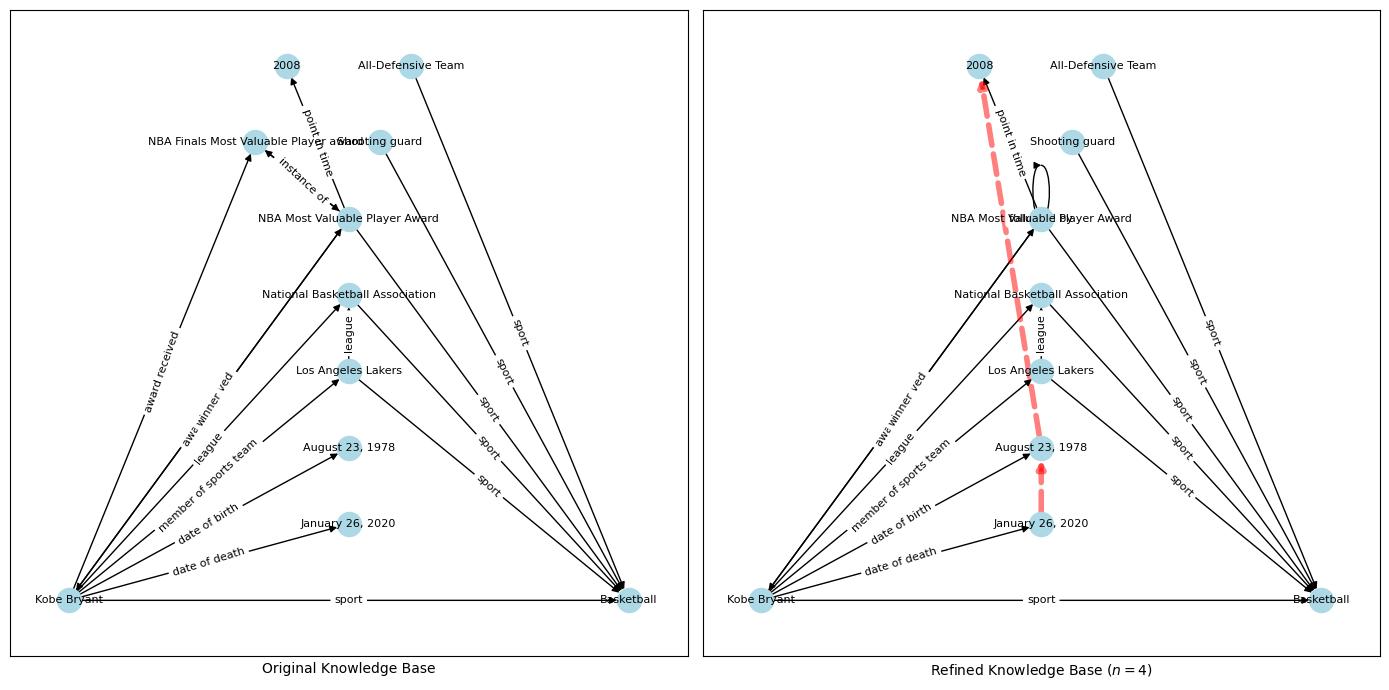

In [76]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), sharex=True, sharey=True)

pos = plot(kb, ax=ax1)
ax1.set_xlabel("Original Knowledge Base")

pos = plot(refined_kb, ax=ax2, pos=pos)
ax2.set_xlabel("Refined Knowledge Base ($n=4$)")

plt.tight_layout()
plt.show()

In [77]:
target_kb = KB.from_relations(
    get_relations(
        query,
        "",
    ),
    similarity_threshold=0.9,
)

mapping = search(kb, target_kb, verbose=True, threshold=0.5)
mapping

Iteration 0
Matching entities ['Most valuable player', 'Basketball', 'Kobe'] in ['Kobe Bryant', 'August 23, 1978', 'January 26, 2020', 'Basketball', 'Los Angeles Lakers', 'National Basketball Association', 'NBA Most Valuable Player Award', 'NBA Finals Most Valuable Player award', 'Shooting guard', 'All-Defensive Team', '2008']
i=0, candidate_vertices=(({'title': 'NBA Most Valuable Player Award', 'url': 'https://en.wikipedia.org/wiki/NBA_Most_Valuable_Player_Award', 'summary': ''}, 0.7662790417671204), ({'title': 'Basketball', 'url': 'https://en.wikipedia.org/wiki/Basketball', 'summary': ''}, 1.0), ({'title': 'Kobe Bryant', 'url': 'https://en.wikipedia.org/wiki/Kobe_Bryant', 'summary': ''}, 0.9160639047622681))


{'Most valuable player': 'NBA Most Valuable Player Award',
 'Basketball': 'Basketball',
 'Kobe': 'Kobe Bryant'}

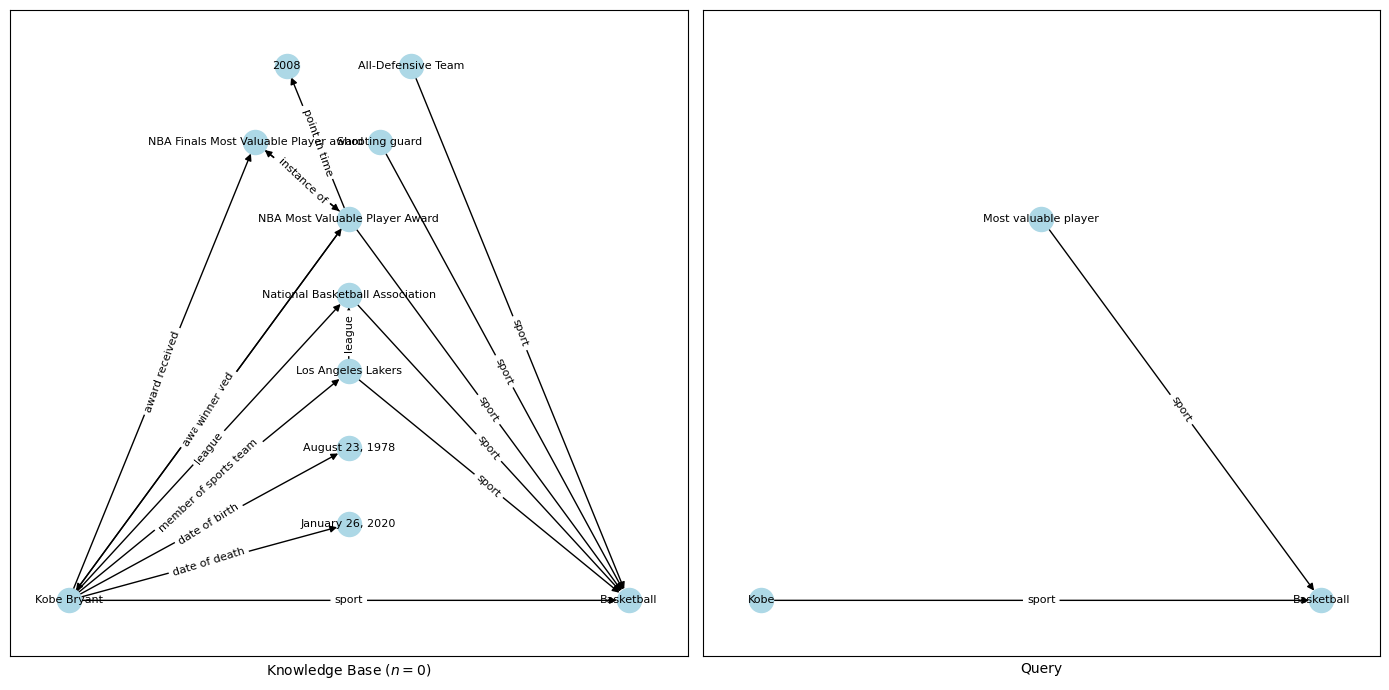

In [78]:
target_pos = {k: pos[v] for k, v in mapping.items()}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), sharex=True, sharey=True)

plot(kb, ax=ax1)
ax1.set_xlabel("Knowledge Base ($n=0$)")

plot(target_kb, ax=ax2, pos=target_pos)
ax2.set_xlabel("Query")

plt.tight_layout()
plt.show()